In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### 1. Configuration

In [2]:
# Configuration
BASE_URL = "https://5772165a-963f-4d38-9b9d-11ecac130c62.deepnoteproject.com"  # Replace with your Deepnote URL
RPI_MAC = "0xe45f01e89bd0"  # Replace with your RPI's MAC address

# Step 1: Check server status
print("Checking server status...")
response = requests.get(f"{BASE_URL}/status")
print("Server Status:", response.json())

Checking server status...
Server Status: {'redis_connected': True, 'status': 'running'}


### 2. Register sensor

In [7]:
# Step 2: Register sensor
sensor_data = {"mac_address": RPI_MAC}
response = requests.post(f"{BASE_URL}/sensors", json=sensor_data)
# Note: 409 status is ok as it means sensor already exists
if response.status_code == 409:
    print(f"Sensor already registered")
else:
    response.raise_for_status()
    print("Sensor Registration:", response.json())

Sensor already registered


### 3. Get historical data

In [8]:
print("\nFetching historical data...")
# Get last 7 days of data
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=7)).strftime('%Y-%m-%d')

params = {
    "start_date": start_date,
    "end_date": end_date
}

full_url = f"{BASE_URL}/data/{RPI_MAC}"
print(f"Making request to: {full_url}")
print(f"With parameters: {params}")

try:
    response = requests.get(full_url, params=params)
    print(f"Response status code: {response.status_code}")
    print(f"Response text: {response.text}")
    response.raise_for_status()
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"Request failed: {str(e)}")


Fetching historical data...
Making request to: https://5772165a-963f-4d38-9b9d-11ecac130c62.deepnoteproject.com/data/0xe45f01e89bd0
With parameters: {'start_date': '2025-01-23', 'end_date': '2025-01-30'}
Response status code: 200
Response text: {"mac_address": "0xe45f01e89bd0", "timestamp": [1737985327499, 1737985329754, 1737985332008, 1737985334263, 1737985336518, 1737985338772, 1737985341027, 1737985343282, 1737985345536, 1737985347791, 1737985350045, 1737985496608, 1737985498862, 1737985503371, 1737985505626, 1737985507880, 1737985510135, 1737985512389, 1737985577777, 1737985580032, 1737985582287, 1737985584542, 1737985586798, 1737985589053, 1737985591308, 1737985593563, 1737985595818, 1737985598073, 1737985600328, 1737985602583, 1737985604837, 1737985607092, 1737985609346, 1737985611601, 1737985613856, 1737985616110, 1737985618365, 1737985620620, 1737985622874, 1737985625129, 1737985627383, 1737985629638, 1737985631892, 1737985634147, 1737985636402, 1737985638656, 1737985640911, 1

### 4: Create visualizations


Creating visualizations...


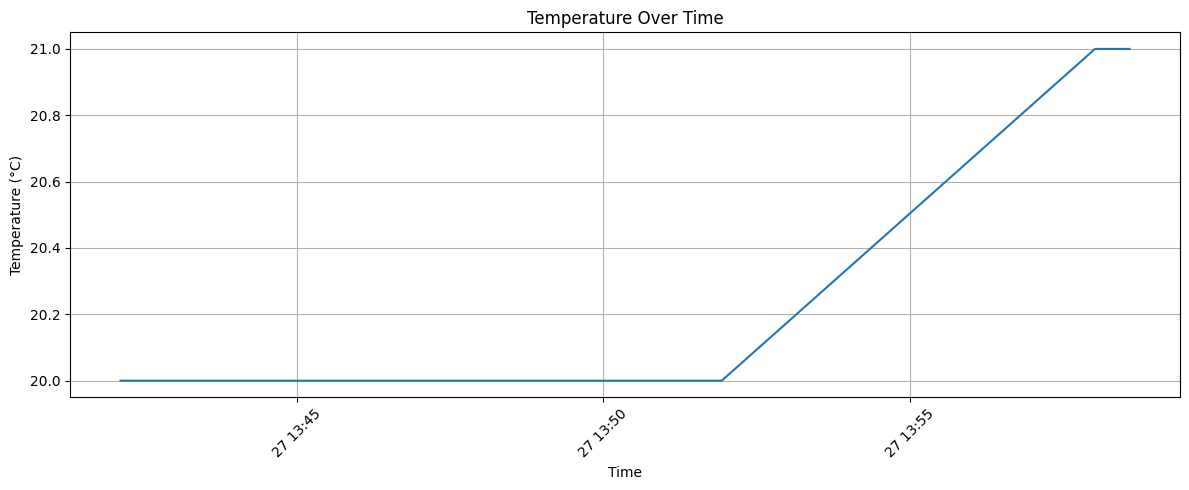

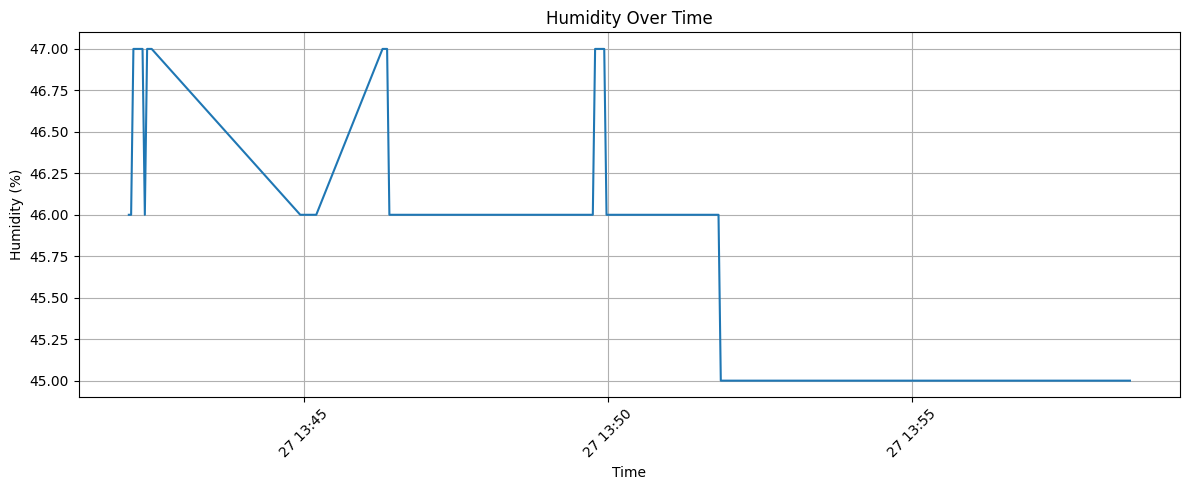


Data visualization complete!


In [10]:
# Step 4: Create visualizations
print("\nCreating visualizations...")
# Convert timestamps to datetime
timestamps = [datetime.fromtimestamp(ts/1000) for ts in data['timestamp']]

# Temperature plot
plt.figure(figsize=(12, 5))
plt.plot(timestamps, data['temperature'])
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Humidity plot
plt.figure(figsize=(12, 5))
plt.plot(timestamps, data['humidity'])
plt.title('Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nData visualization complete!")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5772165a-963f-4d38-9b9d-11ecac130c62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>